In [79]:
# Import Library
import fredapi as fa 
import pandas as pd
import matplotlib.pyplot as plt

1. Federal Funds Effective Rate

In [80]:
# Import interest rate
fred = fa.Fred(api_key='1c6c04d387ef34dca89c616d907bdb79')

period_start = "2017-01-01"
period_end = "2024-01-01"
series_id = 'DFF'

interest_rate = fred.get_series(series_id, period_start, period_end)

interest_df = interest_rate.to_frame('Interest Rate')

# Show interest rate
interest_df

,Interest Rate
2017-01-01,0.55
2017-01-02,0.55
2017-01-03,0.66
2017-01-04,0.66
2017-01-05,0.66
...,...
2023-12-28,5.33
2023-12-29,5.33
2023-12-30,5.33
2023-12-31,5.33


2. S&P/Case-Shiller U.S. National Home Price Index

In [81]:
# Change the series_id 
## Notice that the data frequency is monthly 
series_id = 'CSUSHPISA'

house_index = fred.get_series(series_id, period_start, period_end)
house_df = house_index.to_frame('House Price')
house_df

,House Price
2017-01-01,186.801
2017-02-01,187.313
2017-03-01,187.991
2017-04-01,188.723
2017-05-01,189.615
...,...
2023-06-01,304.593
2023-07-01,306.800
2023-08-01,309.226
2023-09-01,311.255


3. Delinquency Rate on Single-Family Residential Mortgages, Booked in Domestic Offices, All Commercial Banks

In [82]:
# Change the series_id 
series_id = 'DRSFRMACBS'
default_rate = fred.get_series(series_id, period_start, period_end)
default_df = default_rate.to_frame('Default Rate')
default_df

,Default Rate
2017-01-01,3.90
2017-04-01,3.68
2017-07-01,3.64
2017-10-01,3.57
2018-01-01,3.48
2018-04-01,3.22
2018-07-01,2.99
2018-10-01,2.83
2019-01-01,2.70
2019-04-01,2.60


4. Large Bank Consumer Credit Card Balances: Current Credit Score: 50th Percentile

In [83]:
# Change the series_id 
series_id = 'RCCCBSCOREPCT50'
credit_score = fred.get_series(series_id, period_start, period_end)
credit_df = credit_score.to_frame('Credit Score')
credit_df

,Credit Score
2017-01-01,757.0
2017-04-01,758.0
2017-07-01,758.0
2017-10-01,758.0
2018-01-01,758.0
2018-04-01,760.0
2018-07-01,760.0
2018-10-01,760.0
2019-01-01,761.0
2019-04-01,762.0


5. Gross Domestic Product

In [84]:
# Change the series_id 
series_id = 'A939RX0Q048SBEA'
credit_score = fred.get_series(series_id, period_start, period_end)
credit_df = credit_score.to_frame('GDP')
credit_df

,GDP
2017-01-01,59494.0
2017-04-01,59736.0
2017-07-01,60099.0
2017-10-01,60674.0
2018-01-01,61093.0
2018-04-01,61336.0
2018-07-01,61622.0
2018-10-01,61619.0
2019-01-01,61889.0
2019-04-01,62331.0


Analyse 1: Correlate the interest rate and housing prices

In [85]:
# Slice the interest rate dataframe
interest_df = interest_df.loc['2017-01-01':'2023-10-01', :]
interest_df_m = interest_df.resample('MS').mean()

# Merge the two dataframes
merge_df = pd.merge(interest_df_m, house_df, left_index=True, right_index=True)
merge_df

,Interest Rate,House Price
2017-01-01,0.649677,186.801
2017-02-01,0.656786,187.313
2017-03-01,0.786129,187.991
2017-04-01,0.896000,188.723
2017-05-01,0.907419,189.615
...,...,...
2023-06-01,5.076333,304.593
2023-07-01,5.120000,306.800
2023-08-01,5.330000,309.226
2023-09-01,5.330000,311.255


In [86]:
merge_df.corr()

,Interest Rate,House Price
Interest Rate,1.000000,0.397963
House Price,0.397963,1.000000


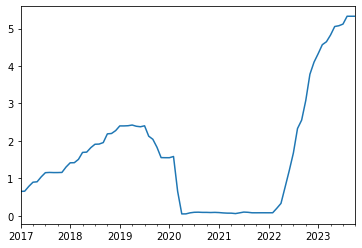

In [87]:
merge_df['Interest Rate'].plot()
plt.show()

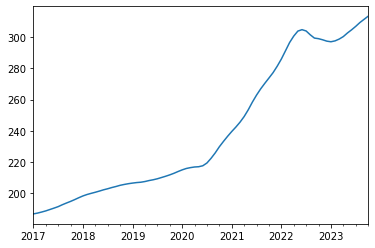

In [88]:
merge_df['House Price'].plot()
plt.show()

As shown in the graph, the housing prices rarely went done in the past five years. The only time it shows drawback was at the beginning of 2022 when interest rate is going up sharply from nearly 0. The housing market went doen for around a year and start to re-gain its ground. This can show that it is unlikely for the housing market to have a crash all of a sudden. Its bullish trend is obvious in general. 

<AxesSubplot:>

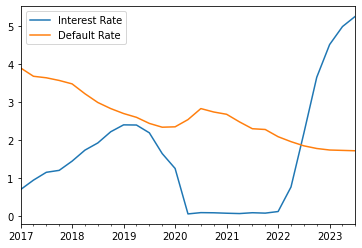

In [89]:
interest_df_q = interest_df.resample('QS').mean()
interest_df_q = interest_df_q.loc['2017-01-01':'2023-07-01', :]
merge_df = pd.merge(interest_df_q, default_df, left_index=True, right_index=True)
merge_df.plot()